dict_keys(['frame0.png', 'frame1.png', 'frame10.png', 'frame11.png', 'frame12.png', 'frame13.png', 'frame14.png', 'frame15.png', 'frame16.png', 'frame17.png', 'frame18.png', 'frame19.png', 'frame2.png', 'frame20.png', 'frame21.png', 'frame22.png', 'frame23.png', 'frame24.png', 'frame25.png', 'frame26.png', 'frame27.png', 'frame28.png', 'frame29.png', 'frame3.png', 'frame30.png', 'frame31.png', 'frame32.png', 'frame33.png', 'frame34.png', 'frame35.png', 'frame36.png', 'frame37.png', 'frame38.png', 'frame39.png', 'frame4.png', 'frame40.png', 'frame41.png', 'frame42.png', 'frame43.png', 'frame44.png', 'frame45.png', 'frame46.png', 'frame47.png', 'frame48.png', 'frame49.png', 'frame5.png', 'frame50.png', 'frame51.png', 'frame52.png', 'frame53.png', 'frame54.png', 'frame55.png', 'frame56.png', 'frame57.png', 'frame58.png', 'frame59.png', 'frame6.png', 'frame60.png', 'frame61.png', 'frame62.png', 'frame63.png', 'frame7.png', 'frame8.png', 'frame9.png'])
['frame0.png', 'frame1.png', 'frame2.p

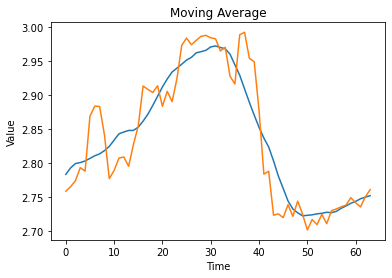

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ma(dat, n, pad_mode='edge'):
    # B x 27
    # weights = np.ones(n) / n
    # # Convolve the input array with the weights using the 'same' mode
    # convolved = np.apply_along_axis(lambda m: np.convolve(m, weights, mode='same'), axis=0, arr=dat)
    # return convolved
    weights = np.ones(n) / n
    # Compute the number of values to pad on each end of the input array
    pad_width = int((n - 1) / 2)
    # Pad the input array with the first and last values
    padded = np.pad(dat, ((pad_width, pad_width), (0, 0)), mode=pad_mode)
    # Convolve the padded array with the weights
    convolved = np.apply_along_axis(lambda m: np.convolve(m, weights, mode='valid'), axis=0, arr=padded)
    return convolved

def read_params(path):
    params = pd.read_csv(path, header=None, sep=" ", index_col=False, lineterminator='\n')
    params.rename(columns={0:'img_name'}, inplace=True)
    params = params.set_index('img_name').T.to_dict('list')
    return params

light_file = '/data/mint/DPM_Dataset/Videos/Jon_1_temporal_smth/params/valid/ffhq-valid-light-anno.txt'
light = read_params(light_file)
all_light = []
print(light.keys())
print(sorted_keys)
print(light.keys())

sorted_keys = sorted(light, key=lambda x: int(x.split('frame')[1].split('.png')[0]))
for k in sorted_keys:
    v = np.array(light[k])
    all_light.append(v)
    
all_light = np.stack(all_light)

n = 13
ma_light = ma(all_light, n=n)
# n_rlp = n//2
# ma_light[0:n_rlp, :] = all_light[0:n_rlp, :]
# ma_light[-(n_rlp+1):, :] = all_light[-(n_rlp+1):, :]
print(ma_light.shape)

plt.plot(ma_light[:,0])
plt.plot(all_light[:,0])
plt.title('Moving Average')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

with open('/data/mint/DPM_Dataset/Videos/Jon_1_temporal_smth/params/valid/ffhq-valid-light-smooth-anno.txt', 'w') as f:
    for i, k in enumerate(sorted_keys):
        f.write(k + ' ' + ' '.join(map(str, ma_light[i, :].tolist())) + '\n')
    